# Version - 29.07, 17:38

In [1]:
import numpy as np
import datetime

In [2]:
import openeo

connection = openeo.connect("openeo.dataspace.copernicus.eu")

In [13]:
connection.describe_collection("SENTINEL2_L2A")

{'assets': {'thumbnail': {'href': 'https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2022/07/tallinn_estonia/24383281-1-eng-GB/Tallinn_Estonia_pillars.jpg',
   'roles': ['thumbnail'],
   'title': 'Sentinel 2 L2A',
   'type': 'image/png'}},
 'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['B01',
    'B02',
    'B03',
    'B04',
    'B05',
    'B06',
    'B07',
    'B08',
    'B8A',
    'B09',
    'B11',
    'B12',
    'WVP',
    'AOT',
    'SCL',
    'sunAzimuthAngles',
    'sunZenithAngles',
    'viewAzimuthMean',
    'viewZenithMean']},
  't': {'extent': ['2015-07-04T00:00:00Z', None], 'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-180, 180],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [-56, 83],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'}},
 'description': 'SENTINEL-2 is a wide-swath, high-resolution, multi-spectral imaging mission, supporting Copernicus Land Monitoring studies, including the monitoring of vegetation, soil and water cover, as well as observation of inland waterways and coastal areas. The SENTINEL-2 Multispectral Instrument (MSI) samples 13 spectral bands: four bands at 10 metres, six bands at 20 metres and three bands at 60 metres spatial resolution.\n The level 2A data is atmospherically corrected using Sen2Cor.',
 'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
  'temporal': {'interval': [['2015-07-04T00:00:00Z', None]]}},
 'id': 'SENTINEL2_L2A',
 'keywords': ['COPERNICUS',
  'ESA',
  'Orthoimagery',
  'Sentinel-2',
  'MSI',
  'Level-2A',
  'Radiometry',
  'Plant Resource',
  'TOC'],
 'license': 'proprietary',
 'links': [{'href': 'https://sentinels.copernicus.eu/documents/247904/690755/Sentinel_Data_Legal_Notice',
   'rel': 'license',
   'type': 'application/pdf'},
  {'href': 'https://documentation.dataspace.copernicus.eu/Data/SentinelMissions/Sentinel2.html#sentinel-2-level-2a-top-of-canopy-toc',
   'rel': 'alternate',
   'type': 'application/html'},
  {'href': 'https://dataspace.copernicus.eu/browser/?zoom=11&lat=45.36638&lng=12.49832&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2F28b654e7-8912-4e59-9e58-85b58d768b3a&datasetId=S2

In [4]:
#only run this once in the beginning; you need a copernicus browser account - https://browser.dataspace.copernicus.eu/

connection.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with OidcBearerAuth>

In [6]:
#Define the Area Of Interest (coordinates are longtitude and latitude)

dphi=0.1 #latitude dimension of rectangle, deg
dl=0.1 #longtitude dimension, deg
phi=42.079094 #center latitude
l=25.121836 #center longtitude

start=datetime.datetime(2023,7,1) #YYYY,MM,DD
end=datetime.datetime(2023,7,29)

In [7]:
# Load the Sentinel-2 data collection
datacube = connection.load_collection(
    "COPERNICUS_VEGETATION_INDICES",
    spatial_extent={"west": l-dl/2, "south": phi-dphi/2, "east": l+dl/2, "north": phi+dphi/2},
    temporal_extent=[start, end],
    bands=["NDVI","PPI","LAI","QFLAG2"]
    #bands=["B02", "B03", "B04","B08"]  # Specify the bands you want to retrieve
)

In [8]:
job = datacube.create_job(out_format="GTiff")

In [9]:
job.start_and_wait()

0:00:00 Job 'j-240731609b4e4797b786166adb4d7fab': send 'start'
0:00:13 Job 'j-240731609b4e4797b786166adb4d7fab': created (progress 0%)
0:00:19 Job 'j-240731609b4e4797b786166adb4d7fab': created (progress 0%)
0:00:25 Job 'j-240731609b4e4797b786166adb4d7fab': running (progress N/A)
0:00:33 Job 'j-240731609b4e4797b786166adb4d7fab': running (progress N/A)
0:00:45 Job 'j-240731609b4e4797b786166adb4d7fab': running (progress N/A)
0:00:58 Job 'j-240731609b4e4797b786166adb4d7fab': running (progress N/A)
0:01:13 Job 'j-240731609b4e4797b786166adb4d7fab': running (progress N/A)
0:01:33 Job 'j-240731609b4e4797b786166adb4d7fab': running (progress N/A)
0:01:58 Job 'j-240731609b4e4797b786166adb4d7fab': running (progress N/A)
0:02:28 Job 'j-240731609b4e4797b786166adb4d7fab': finished (progress 100%)


<BatchJob job_id='j-240731609b4e4797b786166adb4d7fab'>

In [ ]:
job.get_results().download_files("data/out")

In [10]:
import rasterio
import matplotlib.pyplot as plt

im=rasterio.open('data/out/openEO_2023-08-01Z.tif')
#B=im.read(1)*0.0001
#G=im.read(2)*0.0001
#R=im.read(3)*0.0001
NDVI=im.read(1)*0.0001
PPI=im.read(2)*0.0001
LAI=im.read(3)*0.0001
QFLAG2=im.read(4)*0.0001
LAI[LAI<0]=0
LAI[LAI>1]=0

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


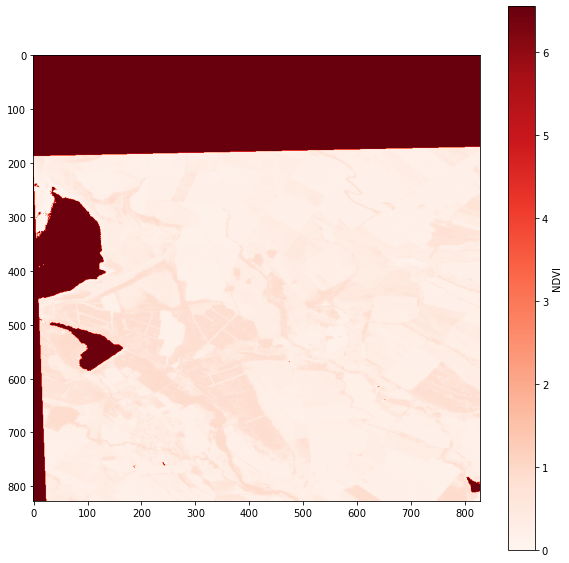

In [11]:
plt.figure(figsize=(10,10))
#plt.imshow(10*np.stack([R,G,B],axis=2))
plt.imshow(NDVI,cmap="Reds")
plt.colorbar(label="NDVI")

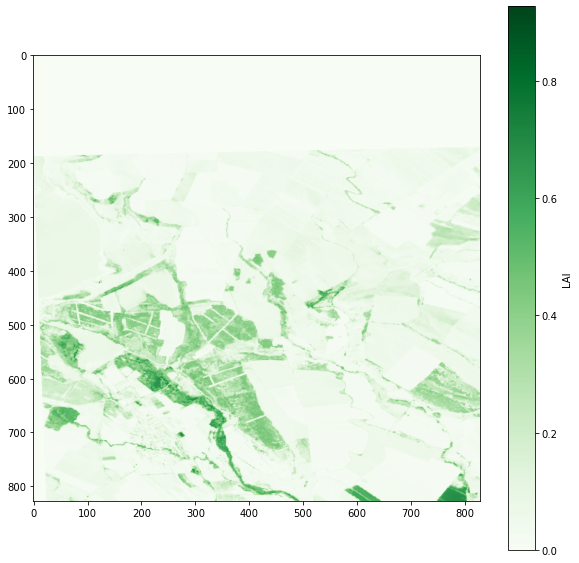

In [12]:
plt.figure(figsize=(10,10))
#plt.imshow(10*np.stack([R,G,B],axis=2))
plt.imshow(LAI,cmap="Greens")
plt.colorbar(label="LAI")

In [ ]:
# all code
import numpy as np
import datetime
import rasterio
import matplotlib.pyplot as plt
import openeo

connection = openeo.connect("openeo.dataspace.copernicus.eu")
#only run this once in the beginning; you need a copernicus browser account - https://browser.dataspace.copernicus.eu/

connection.authenticate_oidc()

#Define the Area Of Interest (coordinates are longtitude and latitude)

dphi=0.1 #latitude dimension of rectangle, deg
dl=0.1 #longtitude dimension, deg
phi=42.079094 #center latitude
l=25.121836 #center longtitude

start=datetime.datetime(2024,7,1) #YYYY,MM,DD
end=datetime.datetime(2024,7,29)

job = datacube.create_job(out_format="GTiff")
job.start_and_wait()
job.get_results().download_files("data/out")

# Useful links

https://documentation.dataspace.copernicus.eu/APIs/openEO/Collections.html
https://documentation.dataspace.copernicus.eu/APIs/openEO/Python_Client/Python.html
https://open-eo.github.io/openeo-python-client/data_access.html
https://docs.openeo.cloud/getting-started/python/#installation